### A common process in air-conditioning systems is the adiabatic mixing of two moist air streams. (no heat transfer)

### Figure 6 schematically shows the problem. Adiabatic mixing is governed by three equations: 

![figure6](./static/fig6.png)

#### According to which, the state point of the resulting mixture lies on the straight line connecting the shape points of the two strems being mixed, and divides the line into two segments, in the same ratio as the masses of dry air in the two streams. 


# Example 4: Adiabatic Mixing of Two Moist Airstreams
#### A stream of 2 m 3 /s of outdoor air at 4°C dry-bulb temperature and 2°C thermodynamic wet-bulb temperature is adiabatically mixed with 6.25 m 3 /s of recirculated air at 25°C dry-bulb temperature and 50% rh. Find the dry-bulb temperature and thermodynamic wet-bulb temperature of the resulting mixture.

### Hence:

#### 1. For t1 = 4°C and 2°C for DB and WB temperatures respectively with an airflow of 2 m3/s

#### 2. For t2 (mix air) = 25°C with 50% relative humidity an airflow of 6.25 m3/s

### To find the dry-bulb and wet-bulb temperature of the resulting adiabatic mix we'll follow the formula (44).




In [54]:
import psychrolib as psy
psy.SetUnitSystem(psy.SI)

# We need to find the specific volume of dry air in order to get the mass air flow of dry air of both conditions
# Specific volume of dry air at t1
v1 = psy.GetDryAirVolume(4.0, 101325.0)
print (v1) # Specific volume in m3/kgda

# Mass flow rate of dry air at t1 equals airflow / specific volumen (4 m3/s / v1)
mda1 = 2.0 / v1
print(mda1) # in Kgda/seg


0.7851338791018997
2.5473362610307473


In [55]:
# values at t2
v2 = psy.GetDryAirVolume(25.0, 101325.0)
print(v2)

# Mass flow rate of dry air at t2
mda2 = 6.25 / v2
print(mda2) # in kgda/seg

0.8446244490500862
7.399738436448429


In [56]:
# Mass flow rate of mix air 
mda3 = mda1 + mda2
print(mda3) # in kgda/s

9.947074697479175


### With masses of dry air resolved (mda1, mda2, mda3), we focus on formula 44: 

![formula44](./static/formula.png)

In [57]:
# Adiabatic proportion = mda2 / mda3
P = mda2 / mda3
print(P) # proportion of adiabatic process line in psychrometric chart

0.7439110151976337


### Hence, the result will be located at the 74.4% of the length of the t1 to t2 process line and exactly on the same line. 

![result](./static/result_ex4.png)

#### With the t3 conditions spotted we then can obtained the desired dry and web bulb temperatures. In this case the values are:

1. DBt3 = 19.5°C
2. WBt3 = 14.5°C

# Plotting the results

In [58]:
#import resources
import matplotlib.pyplot as plt
from psychrochart import PsychroChart, load_config

<AxesSubplot:title={'center':'Psychrometric Chart'}, xlabel='Dry-bulb temperature, $°C$', ylabel='Humidity ratio $w, g_w / kg_{da}$'>

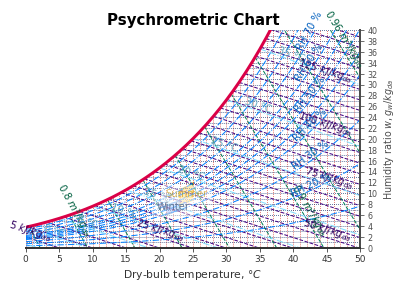

In [59]:
#preconfig chart
chart = PsychroChart()
#plot
chart.plot(ax=plt.gca())


In [60]:
# Add labelled points and conexions between points
points = {'exterior': {'label': 'fresh Air',
                       'style': {'color': [0.592, 0.745, 0.051, 0.9],
                                 'marker': 'o', 'markersize': 10},
                       'xy': (4.0, 70.0)},
          'Return Air': {'label': 'Return Air',
                       'style': {'color': [0.592, 0.745, 0.051, 0.9],
                                 'marker': 'o', 'markersize': 15},
                       'xy': (25.0, 50.0)},
          'Mix': {'label': 'Adiabatic mixture',
                       'style': {'color': [0.855, 0.004, 0.278, 0.8],
                                 'marker': 'X', 'markersize': 10},
                       'xy': (19.5, 58.0)}}
connectors = [{'start': 'exterior',
               'end': 'Return Air',
               'label': 'Adiabaric Process Line',
               'style': {'color': [0.573, 0.106, 0.318, 0.7],
                         "linewidth": 2, "linestyle": "-."}}]
                        
chart.plot_points_dbt_rh(points, connectors)

{'exterior': ([4.0],
  array([3.51502028]),
  {'marker': 'o',
   'markersize': 10,
   'color': [0.592, 0.745, 0.051, 0.9],
   'linewidth': 0,
   'label': 'fresh Air'}),
 'Return Air': ([25.0],
  array([9.88104369]),
  {'marker': 'o',
   'markersize': 15,
   'color': [0.592, 0.745, 0.051, 0.9],
   'linewidth': 0,
   'label': 'Return Air'}),
 'Mix': ([19.5],
  array([8.17812091]),
  {'marker': 'X',
   'markersize': 10,
   'color': [0.855, 0.004, 0.278, 0.8],
   'linewidth': 0,
   'label': 'Adiabatic mixture'})}

In [62]:
# Add a legend to chart
chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
#plot
chart.plot_points_dbt_rh(points, connectors)

plt.show()


![result_ex4](./static/chart_result4.png)